<a href="https://colab.research.google.com/github/122BT0251/Economic-Analysis-of-Colorado-Motor-Vehicle-Sales-Data/blob/main/Colorado_Motor_Vehicle_Sales_Economic_analysis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_squared_error


In [132]:
data = pd.read_csv("/content/colorado_motor_vehicle_sales.csv")

In [133]:
data.head()

,year,quarter,county,sales
0,2008,1,Adams,231609000
1,2008,1,Arapahoe,550378000
2,2008,1,Boulder/Broomfield,176771000
3,2008,1,Denver,200103000
4,2008,1,Douglas,93259000


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     501 non-null    int64 
 1   quarter  501 non-null    int64 
 2   county   501 non-null    object
 3   sales    501 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [135]:
data.isnull().sum()

,0
year,0
quarter,0
county,0
sales,0


In [136]:
data.dropna(inplace = True)


In [137]:
data1 = data.groupby('year')

In [138]:
data1.head()

,year,quarter,county,sales
0,2008,1,Adams,231609000
1,2008,1,Arapahoe,550378000
2,2008,1,Boulder/Broomfield,176771000
3,2008,1,Denver,200103000
4,2008,1,Douglas,93259000
56,2009,1,Adams,147150000
57,2009,1,Arapahoe,365064000
58,2009,1,Boulder,103053000
59,2009,1,Broomfield,22194000
60,2009,1,Denver,162119000


Exploratory Data Analysis(EDA)

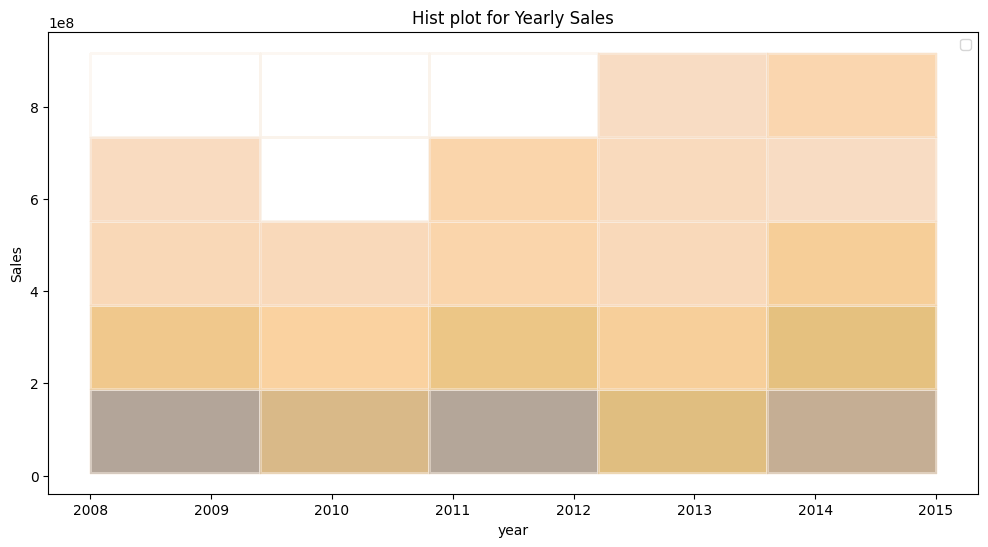

In [139]:
plt.figure(figsize = (12,6))
sns.histplot(data = data , x ='year' ,y = 'sales', color = 'orange' , edgecolor = 'linen' , alpha = 0.5 , bins = 5)
plt.title("Hist plot for Yearly Sales")
plt.xlabel("year")
plt.ylabel("Sales")
plt.legend()
plt.show()

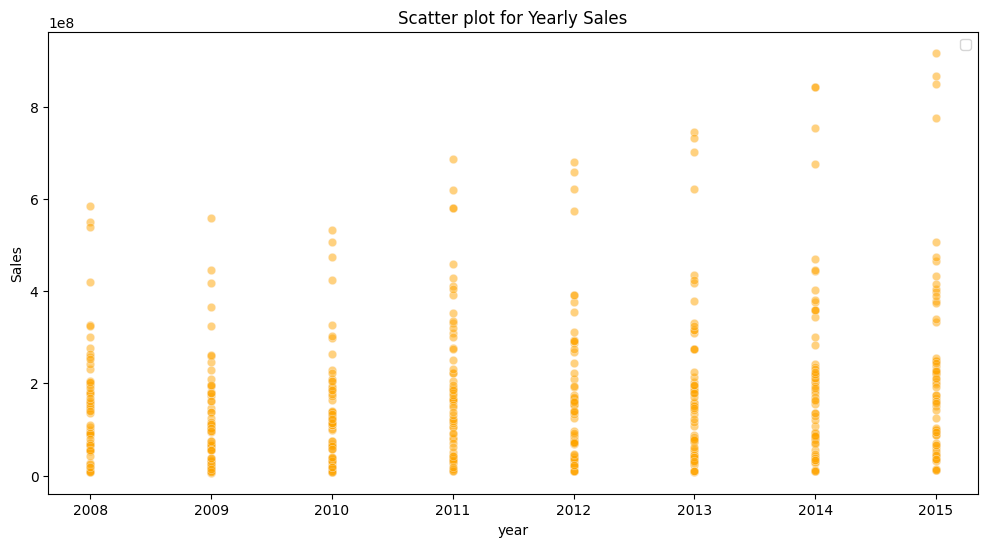

In [140]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = data , x ='year' ,y = 'sales', color = 'orange' , edgecolor = 'linen' , alpha = 0.5)
plt.title("Scatter plot for Yearly Sales")
plt.xlabel("year")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [141]:
data2 = data.groupby('county')

In [142]:
data2.head()

,year,quarter,county,sales
0,2008,1,Adams,231609000
1,2008,1,Arapahoe,550378000
2,2008,1,Boulder/Broomfield,176771000
3,2008,1,Denver,200103000
4,2008,1,Douglas,93259000
...,...,...,...,...
120,2010,1,Broomfield,26093000
131,2010,1,Rest of State,99930000
147,2010,2,Rest of State,109550000
163,2010,3,Rest of State,113584000


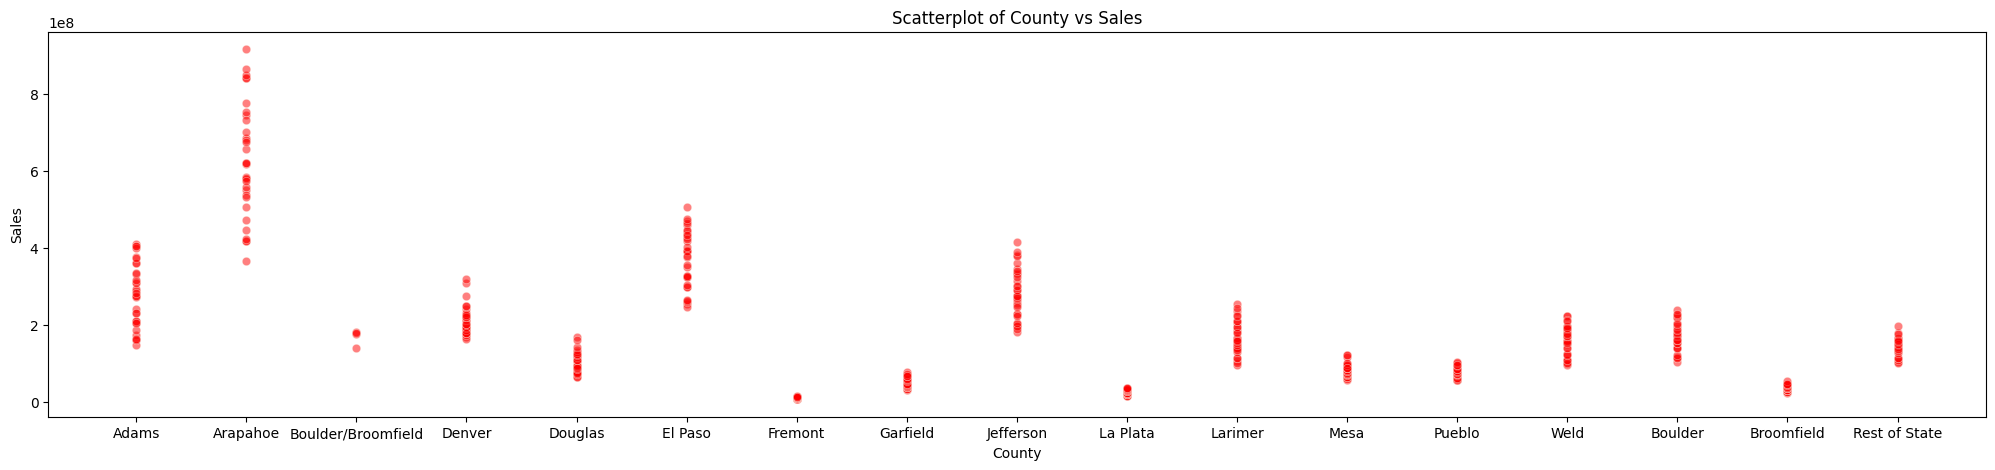

In [143]:

plt.figure(figsize = (25,5))
sns.scatterplot(data = data , x ='county' , y = 'sales' , color = 'red' , edgecolor = 'linen' , alpha = 0.5)
plt.title("Scatterplot of County vs Sales")
plt.xlabel("County")
plt.ylabel("Sales")
plt.show()

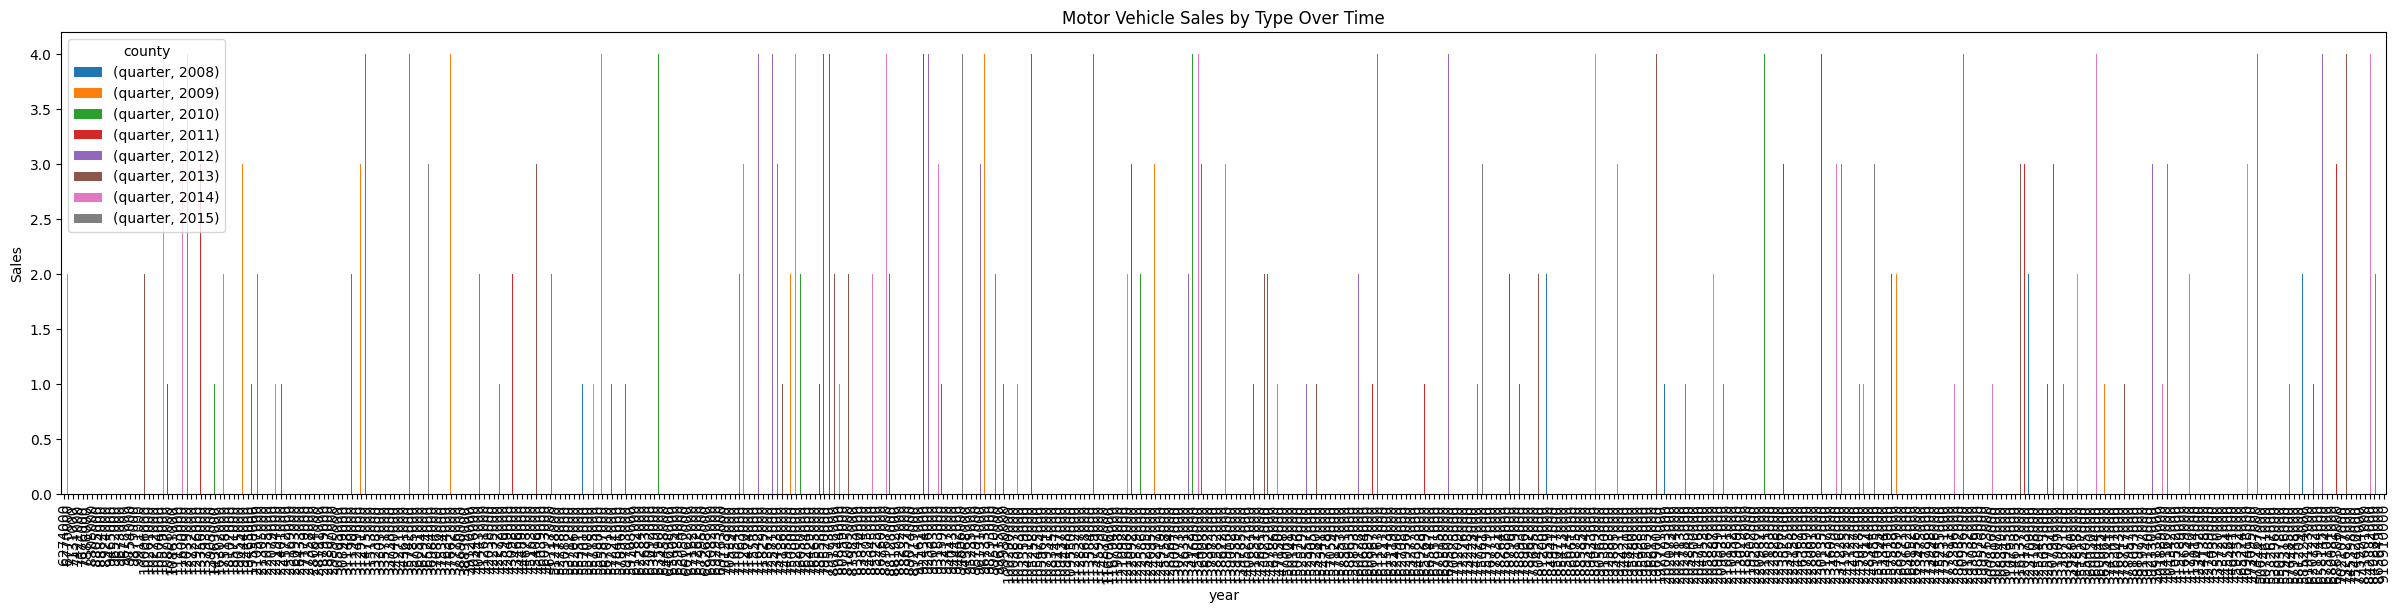

In [144]:
data2 = data.groupby(['sales', 'year']).sum().unstack()
data2.plot(kind='bar', figsize=(30, 6))
plt.title('Motor Vehicle Sales by Type Over Time')
plt.xlabel('year')
plt.ylabel('Sales')
plt.legend(title='county')
plt.show()


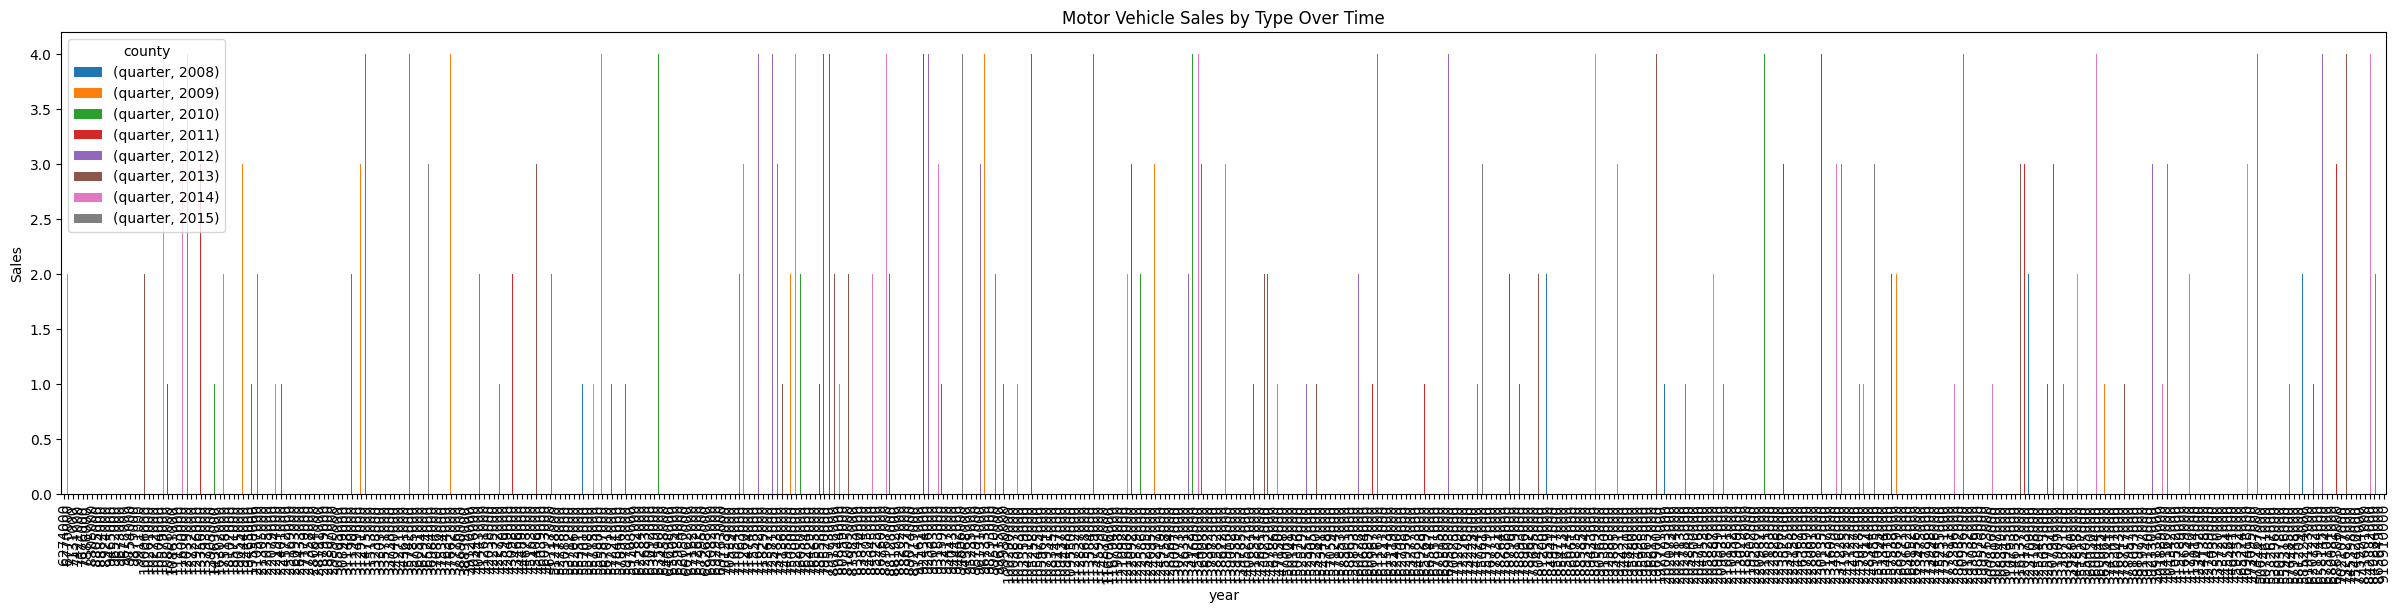

In [145]:
data3 = data.groupby(['sales', 'county']).sum().unstack()
data2.plot(kind='bar', figsize=(30, 6))
plt.title('Motor Vehicle Sales by Type Over Time')
plt.xlabel('year')
plt.ylabel('Sales')
plt.legend(title='county')
plt.show()

**Statistical Analysis**

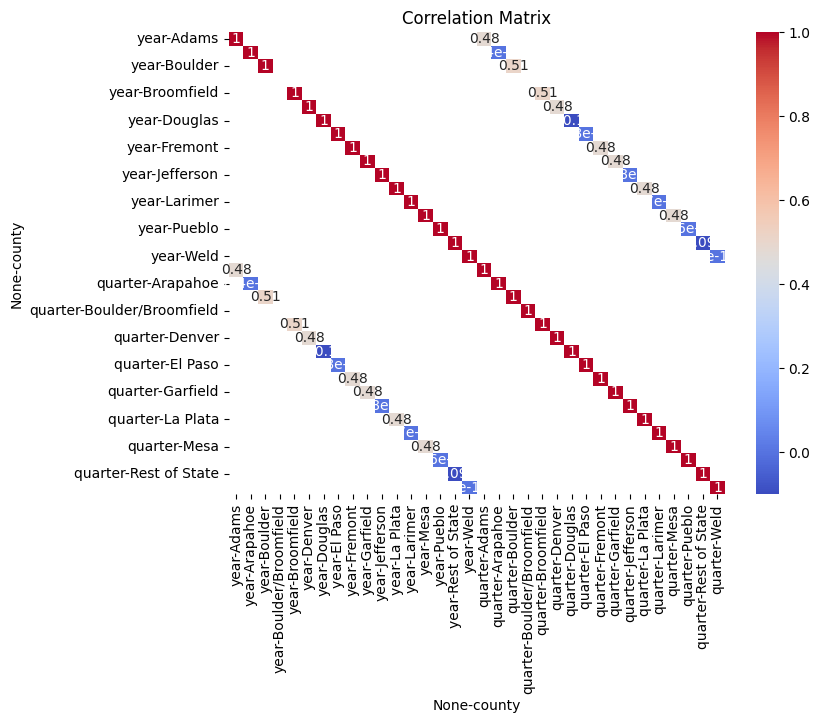

In [146]:
correlation_matrix = data3.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Predictive Modeling**

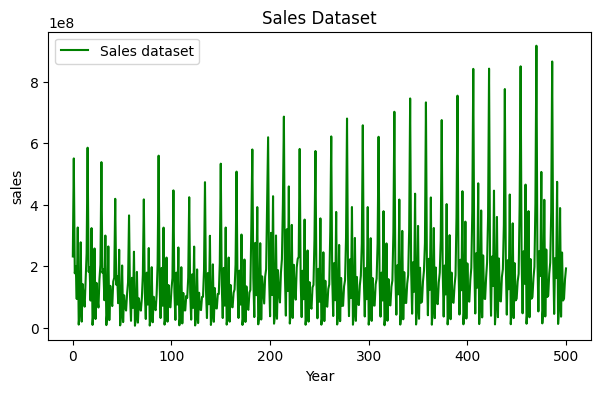

In [151]:
plt.figure(figsize=(7, 4))
plt.plot(data.index, data['sales'], label='Sales dataset', color='green')
plt.title('Sales Dataset')
plt.xlabel('Year')
plt.ylabel('sales')
plt.legend()
plt.show()

In [153]:
model = ARIMA(data['sales'], order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  501
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -10160.986
Date:                Mon, 06 Jan 2025   AIC                          20333.973
Time:                        22:12:09   BIC                          20359.260
Sample:                             0   HQIC                         20343.895
                                - 501                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6477      0.043    -15.097      0.000      -0.732      -0.564
ar.L2         -0.6259      0.056    -11.173      0.000      -0.736      -0.516
ar.L3         -0.3502      0.070     -5.035      0.0

In [154]:
forecast = model_fit.forecast(steps=12)

<ipython-input-157-6fd138fe50e0>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=data.index[-1], periods=12, freq='M'), forecast,


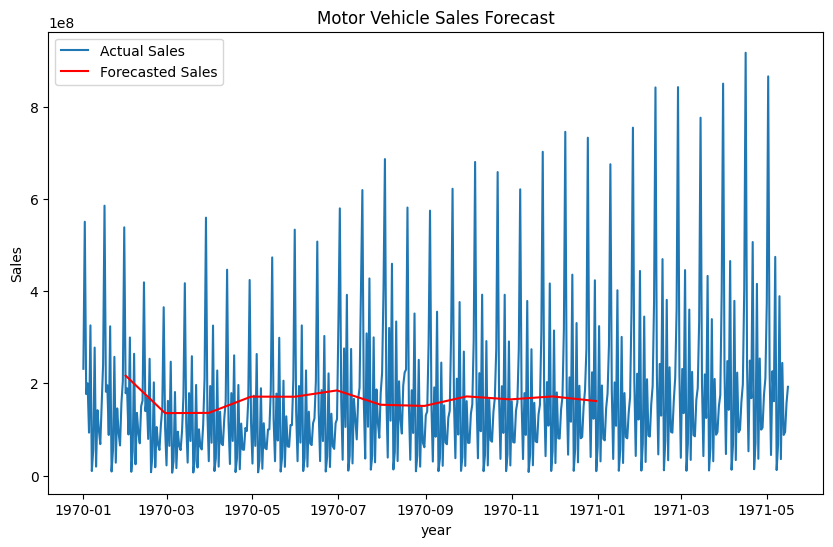

In [157]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['sales'], label='Actual Sales')
plt.plot(pd.date_range(start=data.index[-1], periods=12, freq='M'), forecast,
label='Forecasted Sales', color='red')
plt.title('Motor Vehicle Sales Forecast')
plt.xlabel('year')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [158]:
mse = mean_squared_error(data['sales'][-12:], forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.9060075842158108e+16


**Final Conclusion**


*   Total motor vehicle sales were plotted over time , showing general trends and seasonality.

*   Sales by vehicle type were plotted to compare different categories.



*   Seasonal decomposition of toral sales showed clear seasonal patterns.

*   Correlation analysis showed relationship between sales of different vehicle types.




